In [14]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

In [15]:
crime = pd.read_csv('crime.csv', header=0)

In [16]:
#review data structure
crime.columns

Index(['City', 'Population', 'Violent\ncrime',
       'Murder and\nnonnegligent\nmanslaughter',
       'Rape\n(revised\ndefinition)1', 'Rape\n(legacy\ndefinition)2',
       'Robbery', 'Aggravated\nassault', 'Property\ncrime', 'Burglary',
       'Larceny-\ntheft', 'Motor\nvehicle\ntheft', 'Arson3', 'Unnamed: 13'],
      dtype='object')

In [17]:
crime_mod = crime.copy()

In [18]:
#drop notes rows from end
crime_mod.drop(crime_mod.index[-3:], inplace=True)

In [19]:
crime_mod.tail(2)

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,Unnamed: 13
346,Yonkers,"199,134","1,036",6.000,nan,25,390,615,"2,368",470,"1,662",236,10.000,nan
347,Yorktown Town,"36,643",15,0.000,nan,0,2,13,334,45,287,2,nan,nan


In [20]:
#clean numbers
property_crime = crime_mod['Property\ncrime'].apply(lambda x: int(''.join(list(filter(str.isdigit, str(x))))))
pop = crime_mod['Population'].apply(lambda x: int(''.join(list(filter(str.isdigit, str(x))))))
murder = crime_mod['Murder and\nnonnegligent\nmanslaughter'].apply(lambda x: int(''.join(list(filter(str.isdigit, str(x))))))
robbery = crime_mod['Robbery'].apply(lambda x: int(''.join(list(filter(str.isdigit, str(x))))))

In [21]:
#prep columns for analysis
pop2 = pop**2
murder_flag = murder-murder
robbery_flag = robbery-robbery
for i in murder_flag.index:
    if murder.at[i] > 0:
        murder_flag.at[i] = 1
for i in robbery_flag.index:
    if robbery.at[i] > 0:
        robbery_flag.at[i] = 1

In [37]:
crime_mod['pop'] = pop
crime_mod['pop2'] = pop2
crime_mod['murder'] = murder_flag
crime_mod['robbery'] = robbery_flag


In [41]:
regr = linear_model.LinearRegression()
Y = property_crime
X = crime_mod[['pop','pop2','murder','robbery']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [ 3.46570268e-02 -2.11108019e-09  1.51866535e+01 -9.62774363e+01]

Intercept: 
 -109.5753356225747

R-squared:
0.9961247104988709


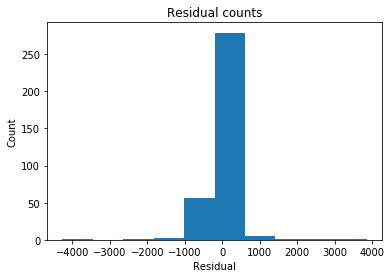

In [43]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = property_crime

# Calculate the error, also called the residual.
residual = actual - predicted

plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

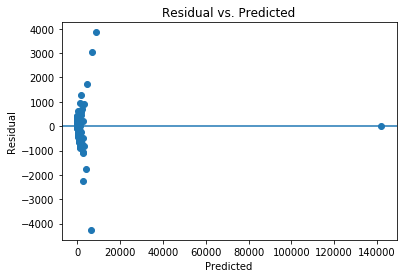

In [44]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

# Hm... looks a bit concerning.

In [ ]:
#maybe the model will run better without NYC

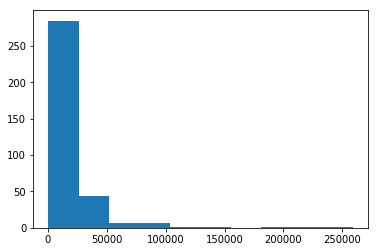

In [45]:
#drop the outlier
crime_mod.drop(crime_mod.index[max_pop], inplace=True)
pop = crime_mod['Population'].apply(lambda x: int(''.join(list(filter(str.isdigit, str(x))))))
plt.hist(pop) 
plt.show()

In [49]:
regr = linear_model.LinearRegression()
Y = property_crime
X = crime_mod[['pop','pop2','murder','robbery']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [1.29510871e-02 1.14920528e-07 1.95038666e+02 9.28205845e+01]

Intercept: 
 -16.815866321663634

R-squared:
0.8444937611173491


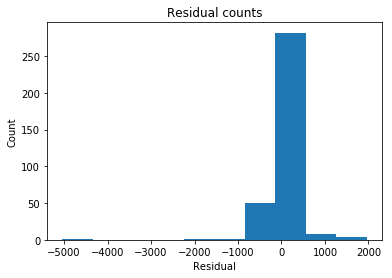

In [50]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = property_crime

# Calculate the error, also called the residual.
residual = actual - predicted

plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

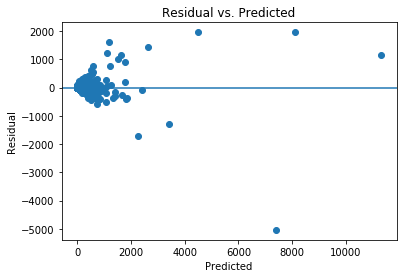

In [51]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

# Hm... looks a bit concerning.